In [1]:
#Bibliotecas para Visualização de Dados
##Importando :
import pandas as pd ##Para a manipulação de DataFrames
import numpy as np ## Cálculo algébricos
import matplotlib.pyplot as plt ## Visualização dos dados
import seaborn as sns ## Gráficos estatísticos atraentes e informativos.

In [2]:
dados_covid = pd.read_csv('WHO-COVID-19-global-data.csv')

In [3]:
dados_covid

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1
...,...,...,...,...,...,...,...,...
13519,2020-05-03,ZW,Zimbabwe,AFRO,0,4,0,34
13520,2020-05-04,ZW,Zimbabwe,AFRO,0,4,0,34
13521,2020-05-05,ZW,Zimbabwe,AFRO,0,4,0,34
13522,2020-05-06,ZW,Zimbabwe,AFRO,0,4,0,34


In [6]:
dados_covid.describe()

,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
count,13524.000000,13524.000000,13524.000000,1.352400e+04
mean,18.796140,437.551020,272.071798,6.859859e+03
std,132.592083,2930.186988,1716.695502,4.424340e+04
min,-1696.000000,0.000000,-2461.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,1.200000e+01
50%,0.000000,1.000000,3.000000,1.020000e+02
75%,1.000000,19.000000,46.000000,9.602500e+02
max,5000.000000,65197.000000,38509.000000,1.193452e+06


In [10]:
dados_covid.columns = ["Dia", "UF", "País", "Região", "Mortes", "Mortes_Acumula", "Confirmados", "Confirmados_Acumula"]

In [11]:
dados_covid

,Dia,UF,País,Região,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1
...,...,...,...,...,...,...,...,...
13519,2020-05-03,ZW,Zimbabwe,AFRO,0,4,0,34
13520,2020-05-04,ZW,Zimbabwe,AFRO,0,4,0,34
13521,2020-05-05,ZW,Zimbabwe,AFRO,0,4,0,34
13522,2020-05-06,ZW,Zimbabwe,AFRO,0,4,0,34


In [12]:
resumo_covid = dados_covid.corr()
resumo_covid

,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
Mortes,1.000000,0.735544,0.771757,0.755376
Mortes_Acumula,0.735544,1.000000,0.646671,0.890256
Confirmados,0.771757,0.646671,1.000000,0.827479
Confirmados_Acumula,0.755376,0.890256,0.827479,1.000000


# Vamos começar a trabalhar com gráficos:

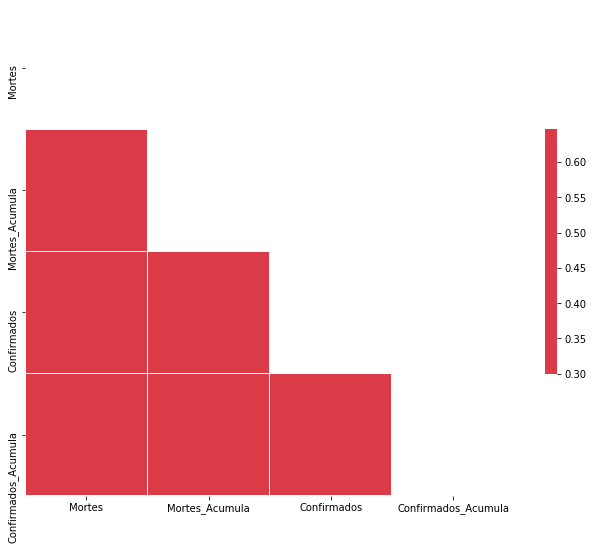

In [13]:
from string import ascii_letters

mask = np.triu(np.ones_like(resumo_covid, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(resumo_covid, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

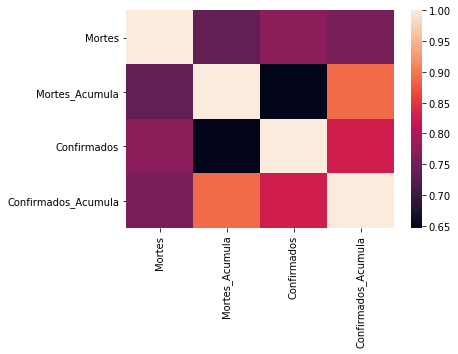

In [14]:
sns.heatmap(resumo_covid)

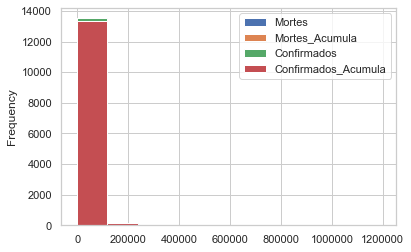

In [70]:
dados_covid.plot(kind="hist")

<Figure size 2.90304e+06x1.45152e+06 with 0 Axes>

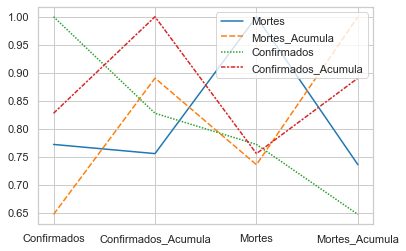

<Figure size 2.90304e+06x1.45152e+06 with 0 Axes>

In [71]:
sns.set(style="whitegrid")

values = resumo_covid.cumsum(axis=0)
dates = pd.date_range("24 02 2020", periods=90, freq="D")
data = pd.DataFrame(values, dates, columns=dados_covid["Dia"])
data = data.rolling(7).mean()

sns.lineplot(data=resumo_covid, palette="tab10", linewidth=1.5)
plt.figure(figsize=(40320,20160))

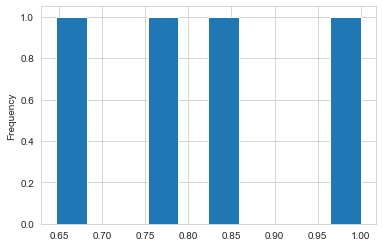

In [15]:
sns.set_style('whitegrid')
resumo_covid['Confirmados'].plot(kind='hist')

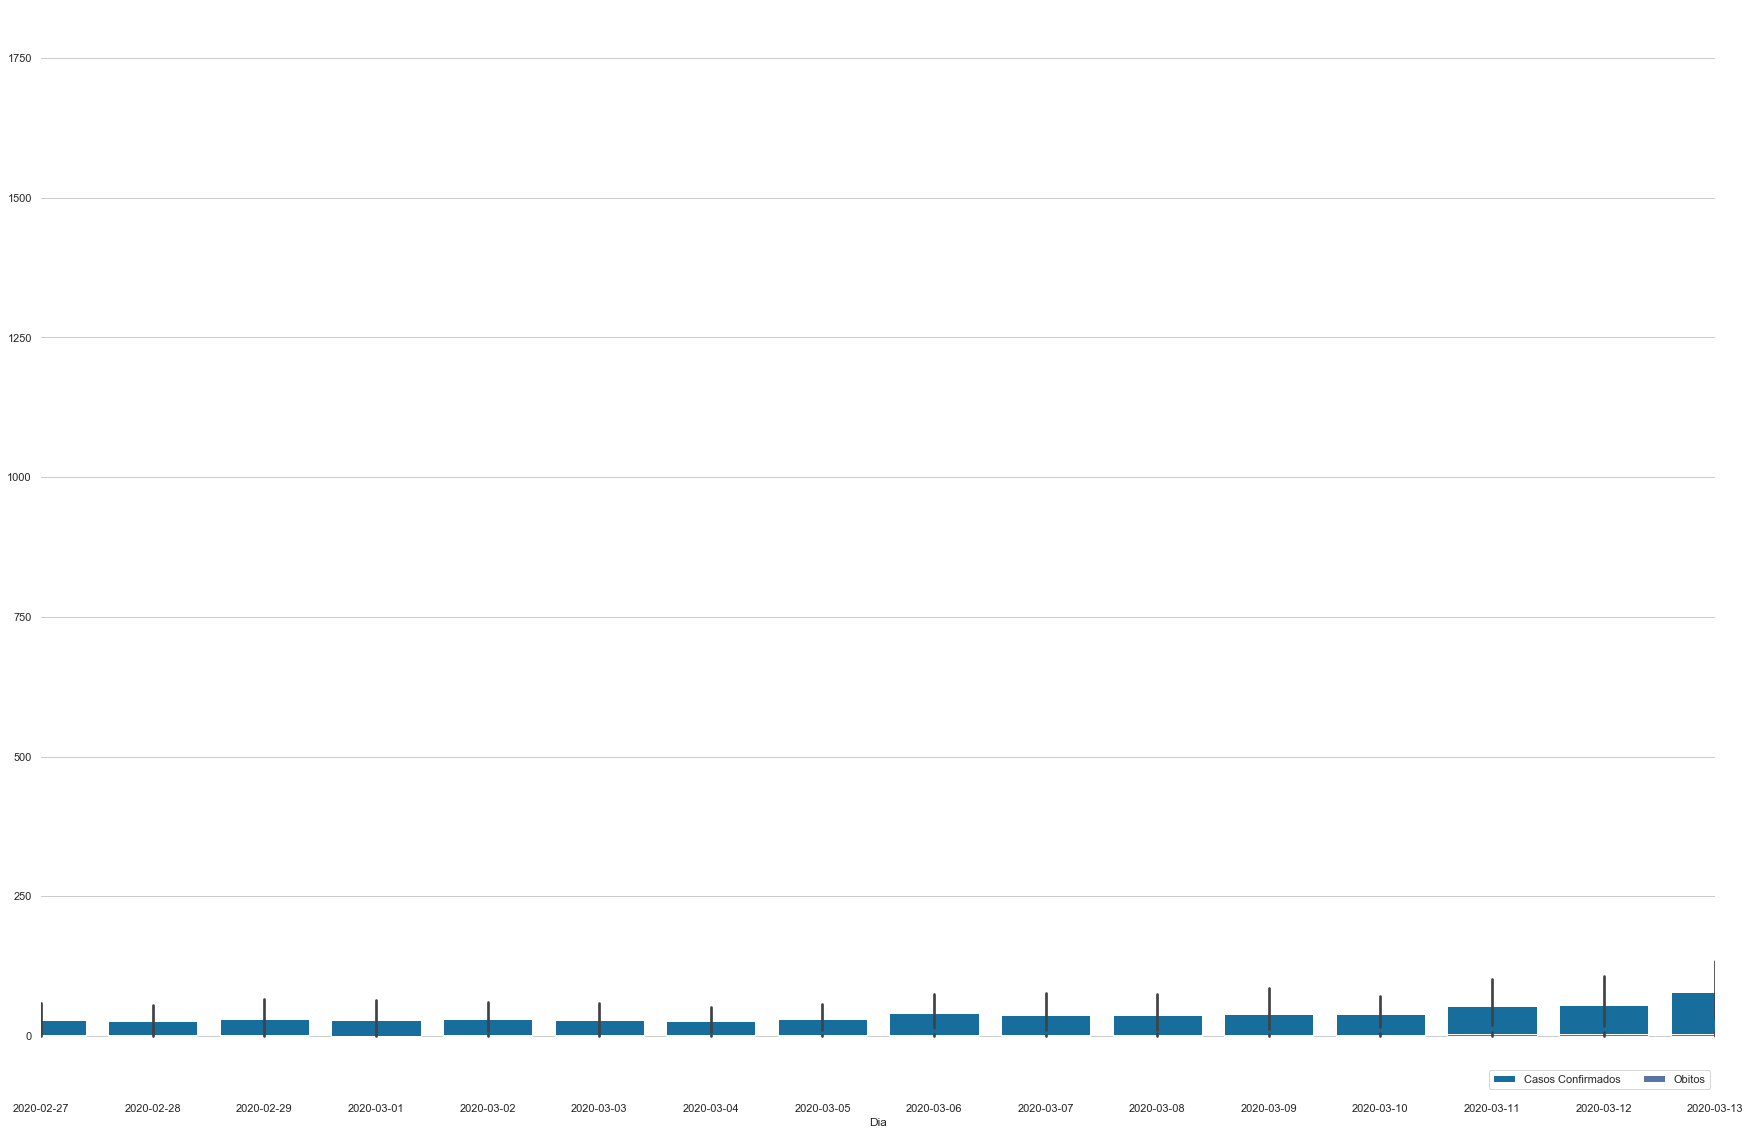

In [50]:
sns.set(style="whitegrid")

# Inicializando figura de matplotlib
f, ax = plt.subplots(figsize=(30,20))

# Plotagem de casos confirmados:
sns.set_color_codes("colorblind")
sns.barplot(x="Dia", y="Confirmados", data=dados_covid,
           label="Casos Confirmados", color="b")

# Plotagem de obitos registrados:
sns.set_color_codes("deep")
sns.barplot(x="Dia", y="Mortes", data=dados_covid,
           label="Obitos", color="b")

# Add uma legenda e informações:
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(3,18), ylabel="",
       xlabel="Dia")
sns.despine(left=True, bottom=True)

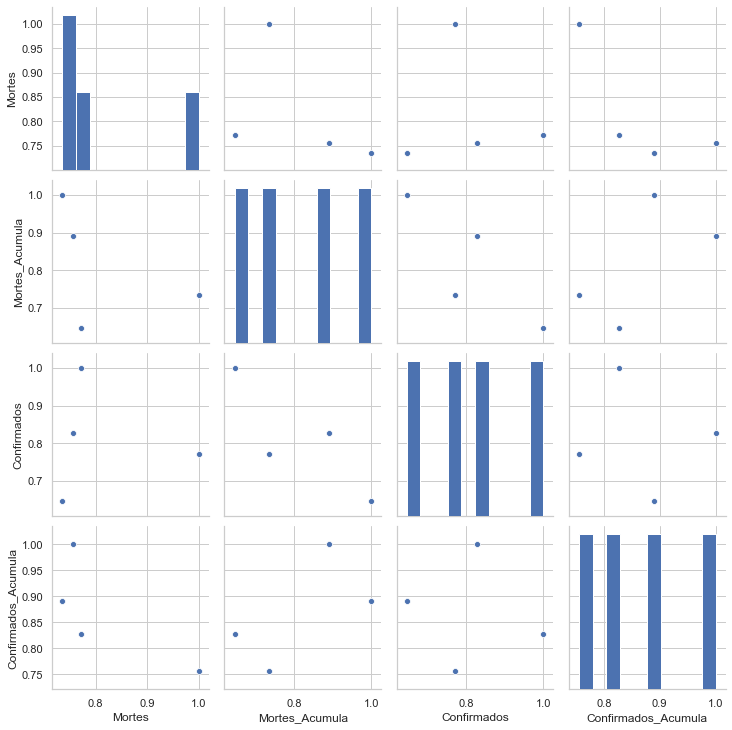

In [63]:
sns.pairplot(resumo_covid)

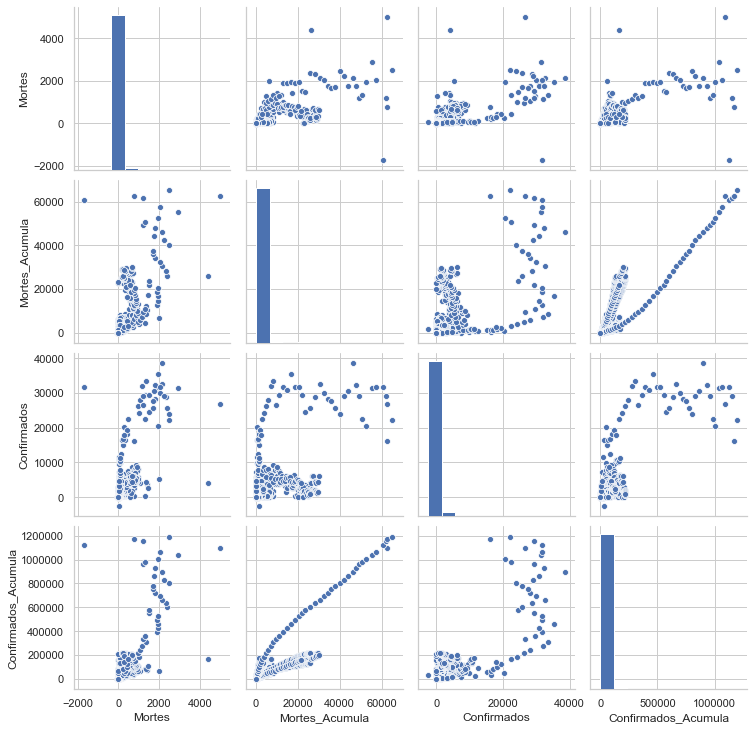

In [53]:
sns.pairplot(dados_covid)

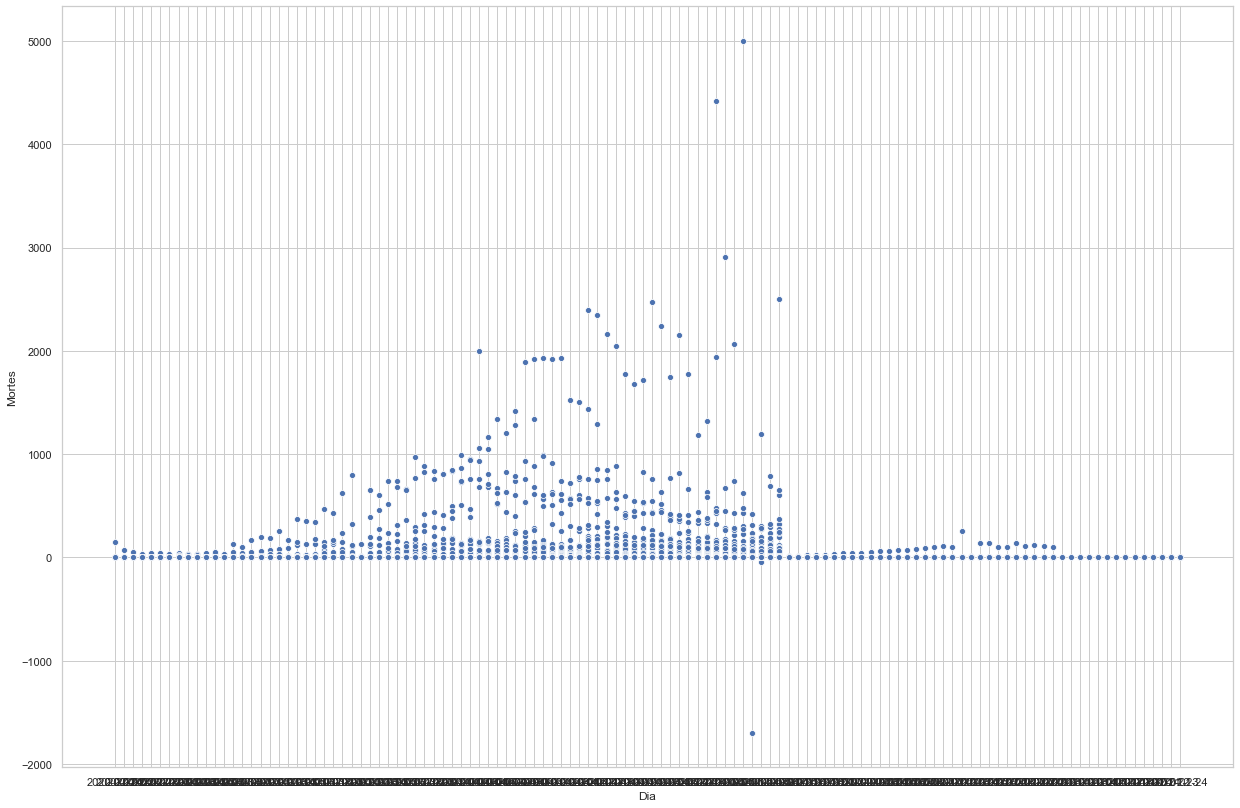

In [58]:
plt.figure(figsize=(21,14))
sns.scatterplot(x=dados_covid["Dia"], y=dados_covid["Mortes"])

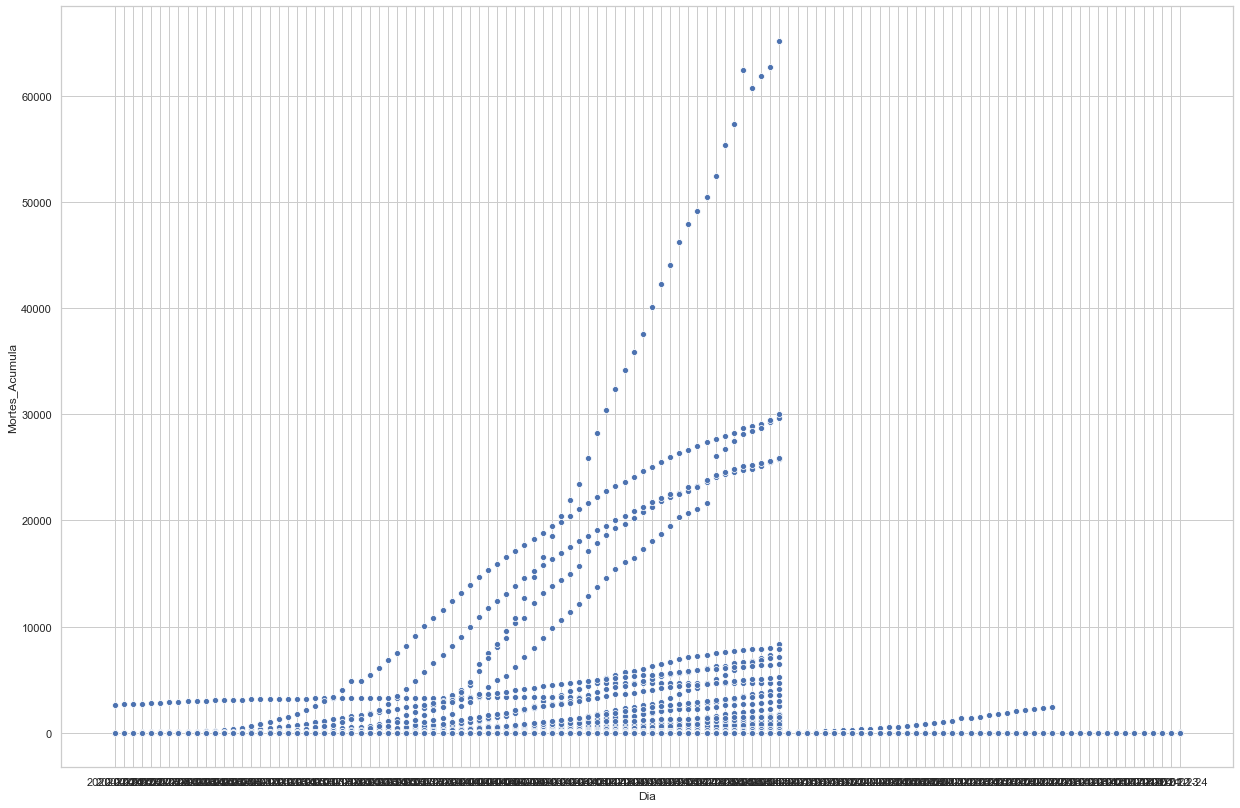

In [59]:
plt.figure(figsize=(21,14))
sns.scatterplot(x=dados_covid["Dia"], y=dados_covid["Mortes_Acumula"])

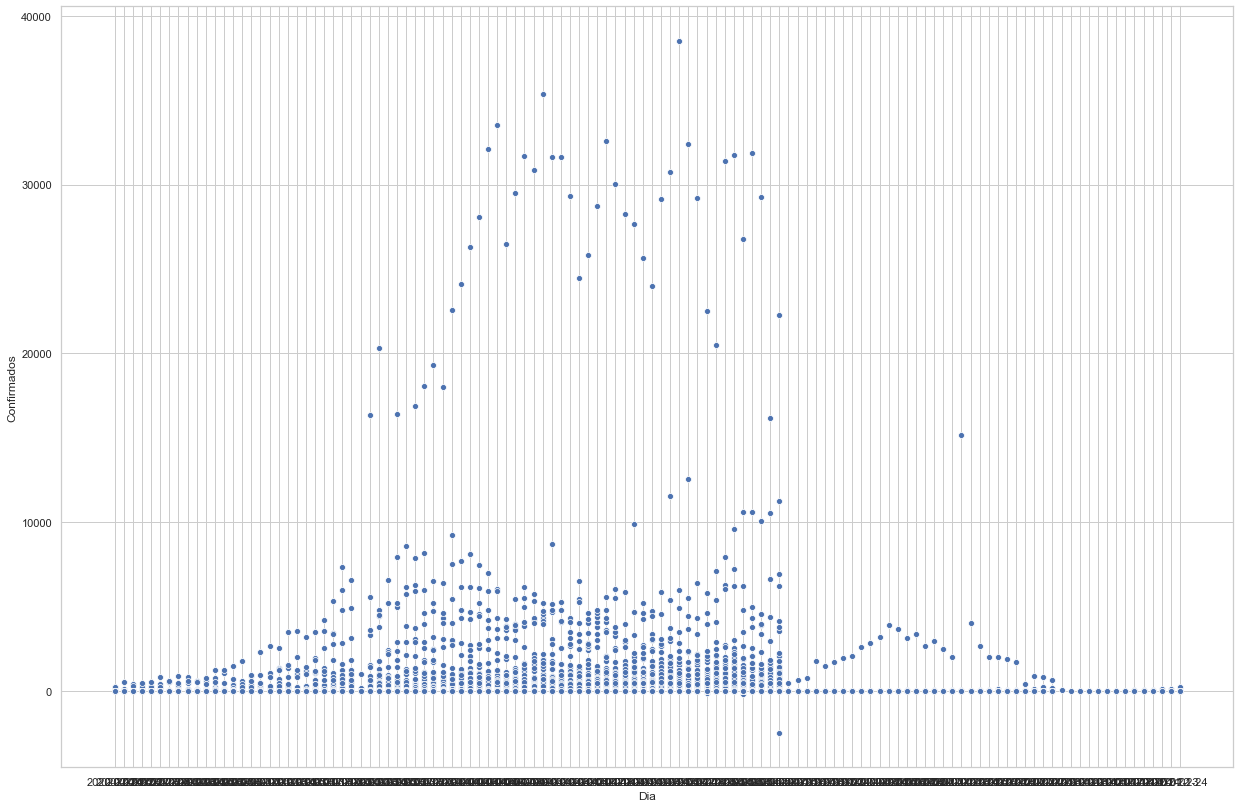

In [64]:
plt.figure(figsize=(21,14))
sns.scatterplot(x=dados_covid["Dia"], y=dados_covid["Confirmados"])

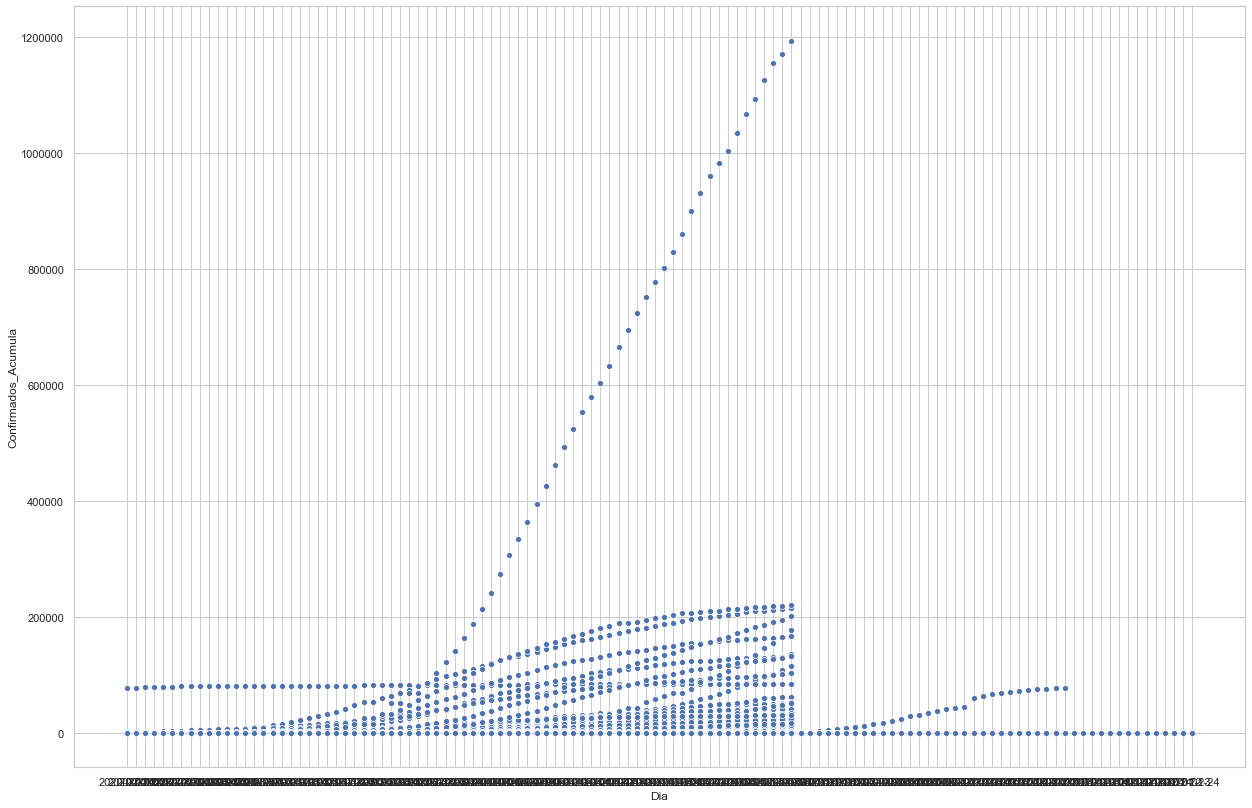

In [65]:
plt.figure(figsize=(21,14))
sns.scatterplot(x=dados_covid["Dia"], y=dados_covid["Confirmados_Acumula"])

## Amanha trabalharemos com dados exclusivamente do Brasil  (para obtermos uma melhor visualização da situação aqui)

In [69]:
dados_covid_brasil = dados_covid[dados_covid['País']=='Brazil']
dados_covid_brasil

,Dia,UF,País,Região,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
1659,2020-02-26,BR,Brazil,AMRO,0,0,1,1
1660,2020-02-27,BR,Brazil,AMRO,0,0,0,1
1661,2020-02-28,BR,Brazil,AMRO,0,0,0,1
1662,2020-02-29,BR,Brazil,AMRO,0,0,0,1
1663,2020-03-01,BR,Brazil,AMRO,0,0,1,2
...,...,...,...,...,...,...,...,...
1726,2020-05-03,BR,Brazil,AMRO,428,6329,6209,91589
1727,2020-05-04,BR,Brazil,AMRO,421,6750,4970,96559
1728,2020-05-05,BR,Brazil,AMRO,275,7025,4588,101147
1729,2020-05-06,BR,Brazil,AMRO,296,7321,6633,107780
